<a href="https://colab.research.google.com/github/DaVOVAN/MO_Trefilov/blob/main/laba1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Этот набор данных включает 9105 индивидуальных критически больных пациентов в пяти медицинских центрах США, которые были приняты на лечение в 1989-1991 и 1992-1994 годах. Каждая строка содержит данные о госпитализированных пациентах, которые отвечают критериям включения и исключения по девяти категориям заболеваний: острая респираторная недостаточность, хроническая обструктивная легочная болезнь, конгестирующая сердечная недостаточность, печеночная болезнь, кома, рак толстой кишки, рак легких, множественная неисправность органов из-за злокачественных образований, и множественная неисправность органов с сепсисом.


Due to the high percentage of missing values, there are a couple of recommended imputation values:
According to the HBiostat Repository (https://hbiostat.org/data/repo/supportdesc, Professor Frank Harrell) the following default values have been found to be useful in imputing missing baseline physiologic data:
Baseline Variable	Normal Fill-in Value
- Serum albumin (alb)	3.5
- PaO2/FiO2 ratio (pafi) 	333.3
- Bilirubin (bili)	1.01
- Creatinine (crea)	1.01
- bun	6.51
- White blood count (wblc)	9 (thousands)
- Urine output (urine)	2502
There are 159 patients surviving 2 months for whom there were no patient or surrogate interviews. These patients have missing sfdm2.

In [ ]:
pip install ucimlrepo

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
support2 = fetch_ucirepo(id=880)

# data (as pandas dataframes)
X = support2.data.features
y = support2.data.targets

X.insert(2, 'death', y['death'])
X.insert(3, 'hospdead', y['hospdead'])

# metadata
print(support2.metadata)

# variable information
print(support2.variables)


{'uci_id': 880, 'name': 'SUPPORT2', 'repository_url': 'https://archive.ics.uci.edu/dataset/880/support2', 'data_url': 'https://archive.ics.uci.edu/static/public/880/data.csv', 'abstract': "This dataset comprises 9105 individual critically ill patients across 5 United States medical centers, accessioned throughout 1989-1991 and 1992-1994.\nEach row concerns hospitalized patient records who met the inclusion and exclusion criteria for nine disease categories: acute respiratory failure, chronic obstructive pulmonary disease, congestive heart failure, liver disease, coma, colon cancer, lung cancer, multiple organ system failure with malignancy, and multiple organ system failure with sepsis. The goal is to determine these patients' 2- and 6-month survival rates based on several physiologic, demographics, and disease severity information. \nIt is an important problem because it addresses the growing national concern over patients' loss of control near the end of life. It enables earlier deci

In [ ]:
X.head()

,age,sex,death,hospdead,dzgroup,dzclass,num.co,edu,income,scoma,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
0,62.84998,male,0,0,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,...,0.199982,1.199951,141.0,7.459961,NaN,NaN,NaN,7.0,7.0,7.0
1,60.33899,female,1,1,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,...,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,1.0
2,52.74698,female,1,0,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,...,2.199707,2.000000,134.0,7.459961,NaN,NaN,NaN,1.0,0.0,0.0
3,42.38498,female,1,0,Lung Cancer,Cancer,2,11.0,under $11k,0.0,...,NaN,0.799927,139.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0
4,79.88495,female,0,0,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,...,NaN,0.799927,143.0,7.509766,NaN,NaN,NaN,NaN,2.0,2.0


In [ ]:
X.describe()

,age,death,hospdead,num.co,edu,scoma,charges,totcst,totmcst,avtisst,...,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,...,6504.000000,9038.000000,9104.000000,6821.000000,4605.000000,4753.000000,4243.000000,3464.000000,6238.000000,9105.000000
mean,62.650823,0.681054,0.259198,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,...,2.554463,1.770961,137.568541,7.415364,159.873398,32.349463,2191.546047,1.157910,1.637384,1.888272
std,15.593710,0.466094,0.438219,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,...,5.318448,1.686041,6.029326,0.080563,88.391541,26.792288,1455.245777,1.739672,2.231358,2.003763
min,18.041990,0.000000,0.000000,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,...,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,0.000000,0.000000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,...,0.500000,0.899902,134.000000,7.379883,103.000000,14.000000,1165.500000,0.000000,0.000000,0.000000
50%,64.856990,1.000000,0.000000,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,...,0.899902,1.199951,137.000000,7.419922,135.000000,23.000000,1968.000000,0.000000,1.000000,1.000000
75%,73.998960,1.000000,1.000000,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,...,1.899902,1.899902,141.000000,7.469727,188.000000,42.000000,3000.000000,2.000000,3.000000,3.000000
max,101.847960,1.000000,1.000000,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,83.000000,...,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


In [ ]:
X.describe(include=['O'])

,sex,dzgroup,dzclass,income,race,ca,dnr
count,9105,9105,9105,6123,9063,9105,9075
unique,2,8,4,4,5,3,3
top,male,ARF/MOSF w/Sepsis,ARF/MOSF,under $11k,white,no,no dnr
freq,5125,3515,4227,2855,7191,5995,5880


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9105 entries, 0 to 9104
Data columns (total 44 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   sex       9105 non-null   object 
 2   death     9105 non-null   int64  
 3   hospdead  9105 non-null   int64  
 4   dzgroup   9105 non-null   object 
 5   dzclass   9105 non-null   object 
 6   num.co    9105 non-null   int64  
 7   edu       7471 non-null   float64
 8   income    6123 non-null   object 
 9   scoma     9104 non-null   float64
 10  charges   8933 non-null   float64
 11  totcst    8217 non-null   float64
 12  totmcst   5630 non-null   float64
 13  avtisst   9023 non-null   float64
 14  race      9063 non-null   object 
 15  sps       9104 non-null   float64
 16  aps       9104 non-null   float64
 17  surv2m    9104 non-null   float64
 18  surv6m    9104 non-null   float64
 19  hday      9105 non-null   int64  
 20  diabetes  9105 non-null   int6

In [ ]:
X.isnull().sum()

,0
age,0
sex,0
death,0
hospdead,0
dzgroup,0
dzclass,0
num.co,0
edu,1634
income,2982
scoma,1


Serum albumin (alb) 3.5
PaO2/FiO2 ratio (pafi) 333.3
Bilirubin (bili) 1.01
Creatinine (crea) 1.01
bun 6.51
White blood count (wblc) 9 (thousands)
Urine output (urine) 2502 There are 159 patients surviving 2 months for whom there were no patient or surrogate interviews. These patients have missing sfdm2.

In [ ]:
X.alb.fillna(3.5, inplace=True)
X.pafi.fillna(333.3, inplace=True)
X.bili.fillna(1.01, inplace=True)
X.crea.fillna(1.01, inplace=True)
X.bun.fillna(6.51, inplace=True)
X.wblc.fillna(9, inplace=True)
X.urine.fillna(2502, inplace=True)
X.edu.fillna(X['edu'].mean(), inplace=True)
X.totcst.fillna(X['totcst'].mean(), inplace=True)
X.income.fillna('under $11k', inplace=True)
X.drop(['totmcst', 'ph', 'glucose', 'adlp', 'adls'], axis=1, inplace=True)
X.dropna()


<ipython-input-10-913aff6229c0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['totmcst', 'ph', 'glucose', 'adlp', 'adls'], axis=1, inplace=True)


,age,sex,death,hospdead,dzgroup,dzclass,num.co,edu,income,scoma,...,resp,temp,pafi,alb,bili,crea,sod,bun,urine,adlsc
834,55.98599,male,1,1,CHF,COPD/CHF/Cirrhosis,3,18.0,>$50k,0.0,...,20.0,35.59375,409.50000,3.599609,1.699951,1.599854,128.0,31.0,1875.0,0.0
835,74.46698,female,1,1,ARF/MOSF w/Sepsis,ARF/MOSF,1,14.0,$11-$25k,41.0,...,24.0,39.19531,280.93750,3.299805,0.299988,0.599976,130.0,3.0,3690.0,0.0
836,44.90097,female,1,1,MOSF w/Malig,ARF/MOSF,4,14.0,>$50k,0.0,...,26.0,36.29688,125.00000,3.399902,2.500000,2.899902,144.0,40.0,1240.0,0.0
855,37.74698,male,1,1,ARF/MOSF w/Sepsis,ARF/MOSF,4,16.0,$25-$50k,89.0,...,12.0,37.89844,280.00000,4.899414,32.695312,2.599609,138.0,71.0,12.0,3.0
858,57.53000,female,0,0,ARF/MOSF w/Sepsis,ARF/MOSF,4,12.0,$25-$50k,41.0,...,12.0,38.50000,325.68750,2.599609,0.500000,4.099609,125.0,66.0,895.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9055,74.05896,female,1,0,Lung Cancer,Cancer,1,11.0,$11-$25k,0.0,...,10.0,36.00000,111.65625,2.199707,0.599976,1.399902,151.0,39.0,2625.0,7.0
9066,69.36597,male,0,0,ARF/MOSF w/Sepsis,ARF/MOSF,0,12.0,$25-$50k,0.0,...,32.0,35.50000,163.25000,2.500000,0.299988,1.099854,149.0,30.0,4375.0,0.0
9081,54.05298,male,1,0,Lung Cancer,Cancer,1,12.0,$25-$50k,0.0,...,25.0,38.29688,256.00000,1.899902,2.000000,1.299805,144.0,47.0,3100.0,0.0
9090,64.51196,male,0,0,COPD,COPD/CHF/Cirrhosis,2,8.0,$11-$25k,0.0,...,34.0,36.00000,208.56250,2.599609,0.399963,2.699707,136.0,50.0,1205.0,0.0


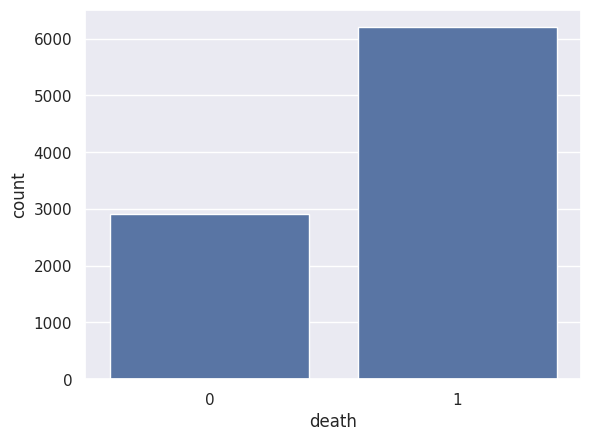

In [ ]:
sns.countplot(x=X["death"]);

<ipython-input-12-60f29688d093>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age_group"] = pd.cut(x=X['age'], bins=[18, 25, 30, 40, 50, 60, 75, 90, 100])


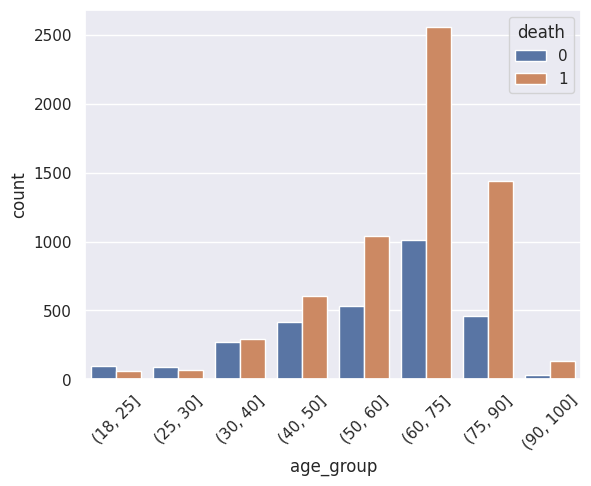

In [ ]:
X["age_group"] = pd.cut(x=X['age'], bins=[18, 25, 30, 40, 50, 60, 75, 90, 100])
plt.xticks(rotation=45)
sns.countplot(data=X, hue='death', x='age_group');

<ipython-input-13-6fe3cadc40db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["prg6m_group"] = pd.cut(x=X['prg6m'], bins=[0.0, 0.25, 0.5, 0.75, 1.0])


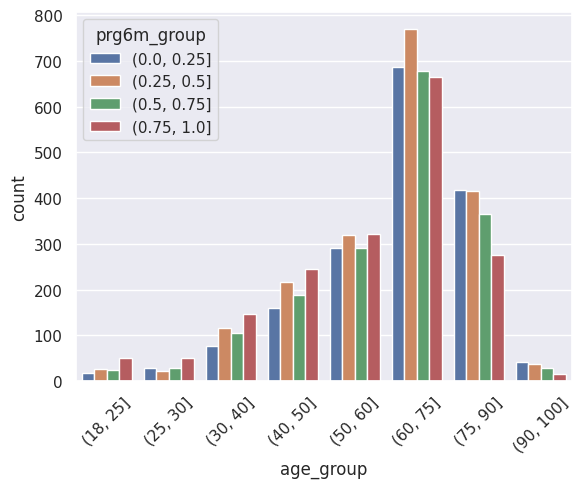

In [ ]:
X["prg6m_group"] = pd.cut(x=X['prg6m'], bins=[0.0, 0.25, 0.5, 0.75, 1.0])
plt.xticks(rotation=45)
sns.countplot(data=X, hue='prg6m_group', x='age_group');

<ipython-input-14-e26a25de9487>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["surv6m_group"] = pd.cut(x=X['surv6m'], bins=[0.0, 0.25, 0.5, 0.75, 1.0])


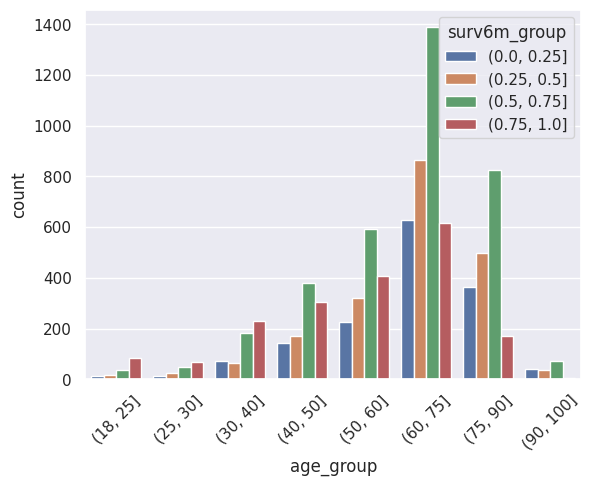

In [ ]:
X["surv6m_group"] = pd.cut(x=X['surv6m'], bins=[0.0, 0.25, 0.5, 0.75, 1.0])
plt.xticks(rotation=45)
sns.countplot(data=X, hue='surv6m_group', x='age_group');

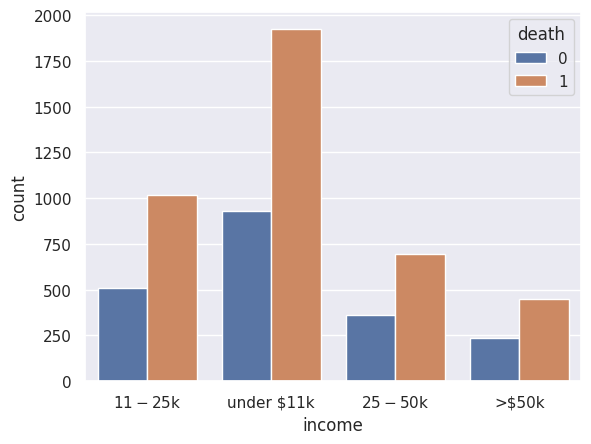

In [ ]:
sns.countplot(data=X, hue='death', x='income');

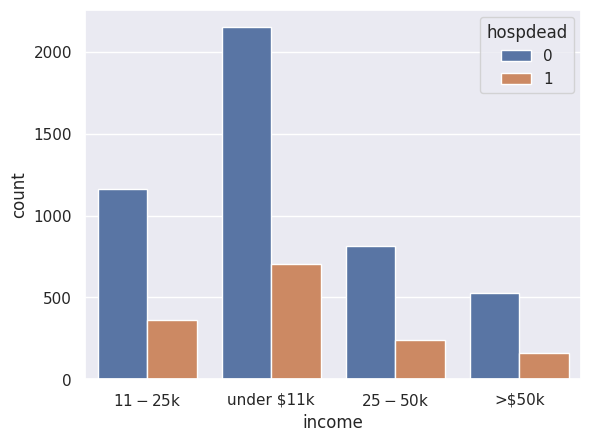

In [ ]:
sns.countplot(data=X, hue='hospdead', x='income');

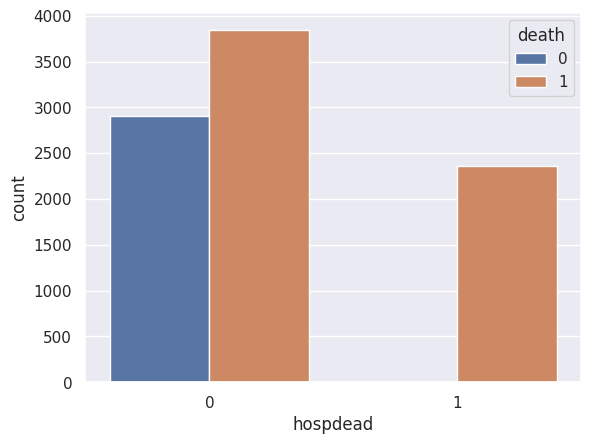

In [ ]:
sns.countplot(data=X, hue='death', x='hospdead');

<ipython-input-75-d9b8a6c44afe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["edu_group"] = pd.cut(x=X['edu'], bins=[1, 4, 9, 12, 15])


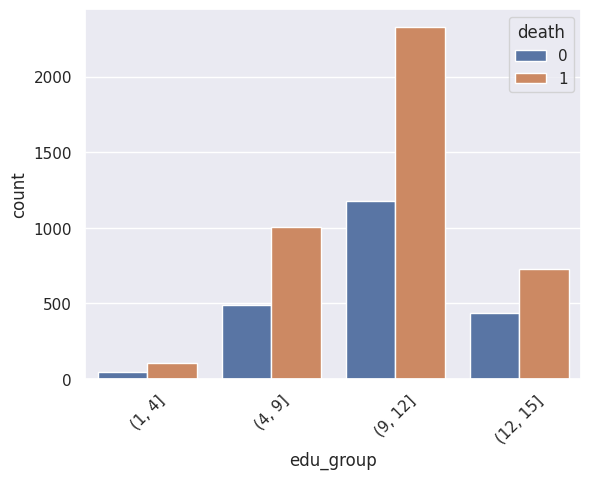

In [ ]:
X["edu_group"] = pd.cut(x=X['edu'], bins=[1, 4, 9, 12, 15])
plt.xticks(rotation=45)
sns.countplot(data=X, hue='death', x='edu_group');

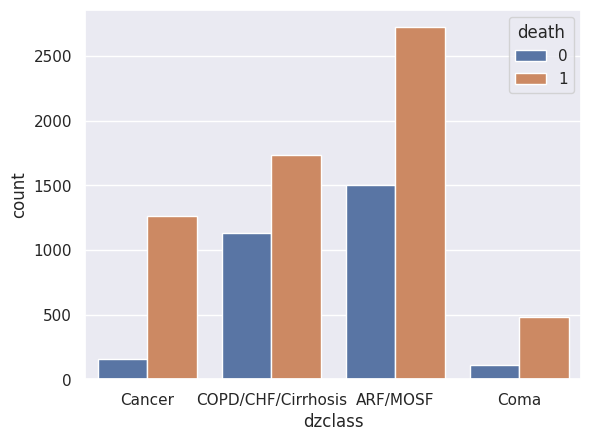

In [ ]:
sns.countplot(data=X, hue='death', x='dzclass');

In [ ]:
sns.pairplot(X, kind="scatter", hue="death");

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X[['sex', 'race']] = enc.fit_transform(X[['sex', 'race']])
X.head()

<ipython-input-15-0369f78f1396>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['sex', 'race']] = enc.fit_transform(X[['sex', 'race']])


,age,sex,death,hospdead,dzgroup,dzclass,num.co,edu,income,scoma,...,alb,bili,crea,sod,bun,urine,adlsc,age_group,prg6m_group,surv6m_group
0,62.84998,1.0,0,0,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,...,1.799805,0.199982,1.199951,141.0,NaN,NaN,7.0,"(60, 75]","(0.0, 0.25]","(0.0, 0.25]"
1,60.33899,0.0,1,1,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,...,NaN,NaN,5.500000,132.0,NaN,NaN,1.0,"(60, 75]",NaN,NaN
2,52.74698,0.0,1,0,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,...,NaN,2.199707,2.000000,134.0,NaN,NaN,0.0,"(50, 60]","(0.25, 0.5]","(0.5, 0.75]"
3,42.38498,0.0,1,0,Lung Cancer,Cancer,2,11.0,under $11k,0.0,...,NaN,NaN,0.799927,139.0,NaN,NaN,0.0,"(40, 50]","(0.25, 0.5]","(0.25, 0.5]"
4,79.88495,0.0,0,0,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,...,NaN,NaN,0.799927,143.0,NaN,NaN,2.0,"(75, 90]","(0.75, 1.0]","(0.5, 0.75]"


In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
res = enc.fit_transform(X[['dzclass']])
enc.categories_

[array(['ARF/MOSF', 'COPD/CHF/Cirrhosis', 'Cancer', 'Coma'], dtype=object)]

In [ ]:
enc.categories_[0]
res.toarray()
X[enc.categories_[0]] = res.toarray()
X.head()

<ipython-input-17-02fc822be58a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[enc.categories_[0]] = res.toarray()
<ipython-input-17-02fc822be58a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[enc.categories_[0]] = res.toarray()
<ipython-input-17-02fc822be58a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,age,sex,death,hospdead,dzgroup,dzclass,num.co,edu,income,scoma,...,bun,urine,adlsc,age_group,prg6m_group,surv6m_group,ARF/MOSF,COPD/CHF/Cirrhosis,Cancer,Coma
0,62.84998,1.0,0,0,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,...,NaN,NaN,7.0,"(60, 75]","(0.0, 0.25]","(0.0, 0.25]",0.0,0.0,1.0,0.0
1,60.33899,0.0,1,1,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,...,NaN,NaN,1.0,"(60, 75]",NaN,NaN,0.0,1.0,0.0,0.0
2,52.74698,0.0,1,0,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,...,NaN,NaN,0.0,"(50, 60]","(0.25, 0.5]","(0.5, 0.75]",0.0,1.0,0.0,0.0
3,42.38498,0.0,1,0,Lung Cancer,Cancer,2,11.0,under $11k,0.0,...,NaN,NaN,0.0,"(40, 50]","(0.25, 0.5]","(0.25, 0.5]",0.0,0.0,1.0,0.0
4,79.88495,0.0,0,0,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,...,NaN,NaN,2.0,"(75, 90]","(0.75, 1.0]","(0.5, 0.75]",1.0,0.0,0.0,0.0


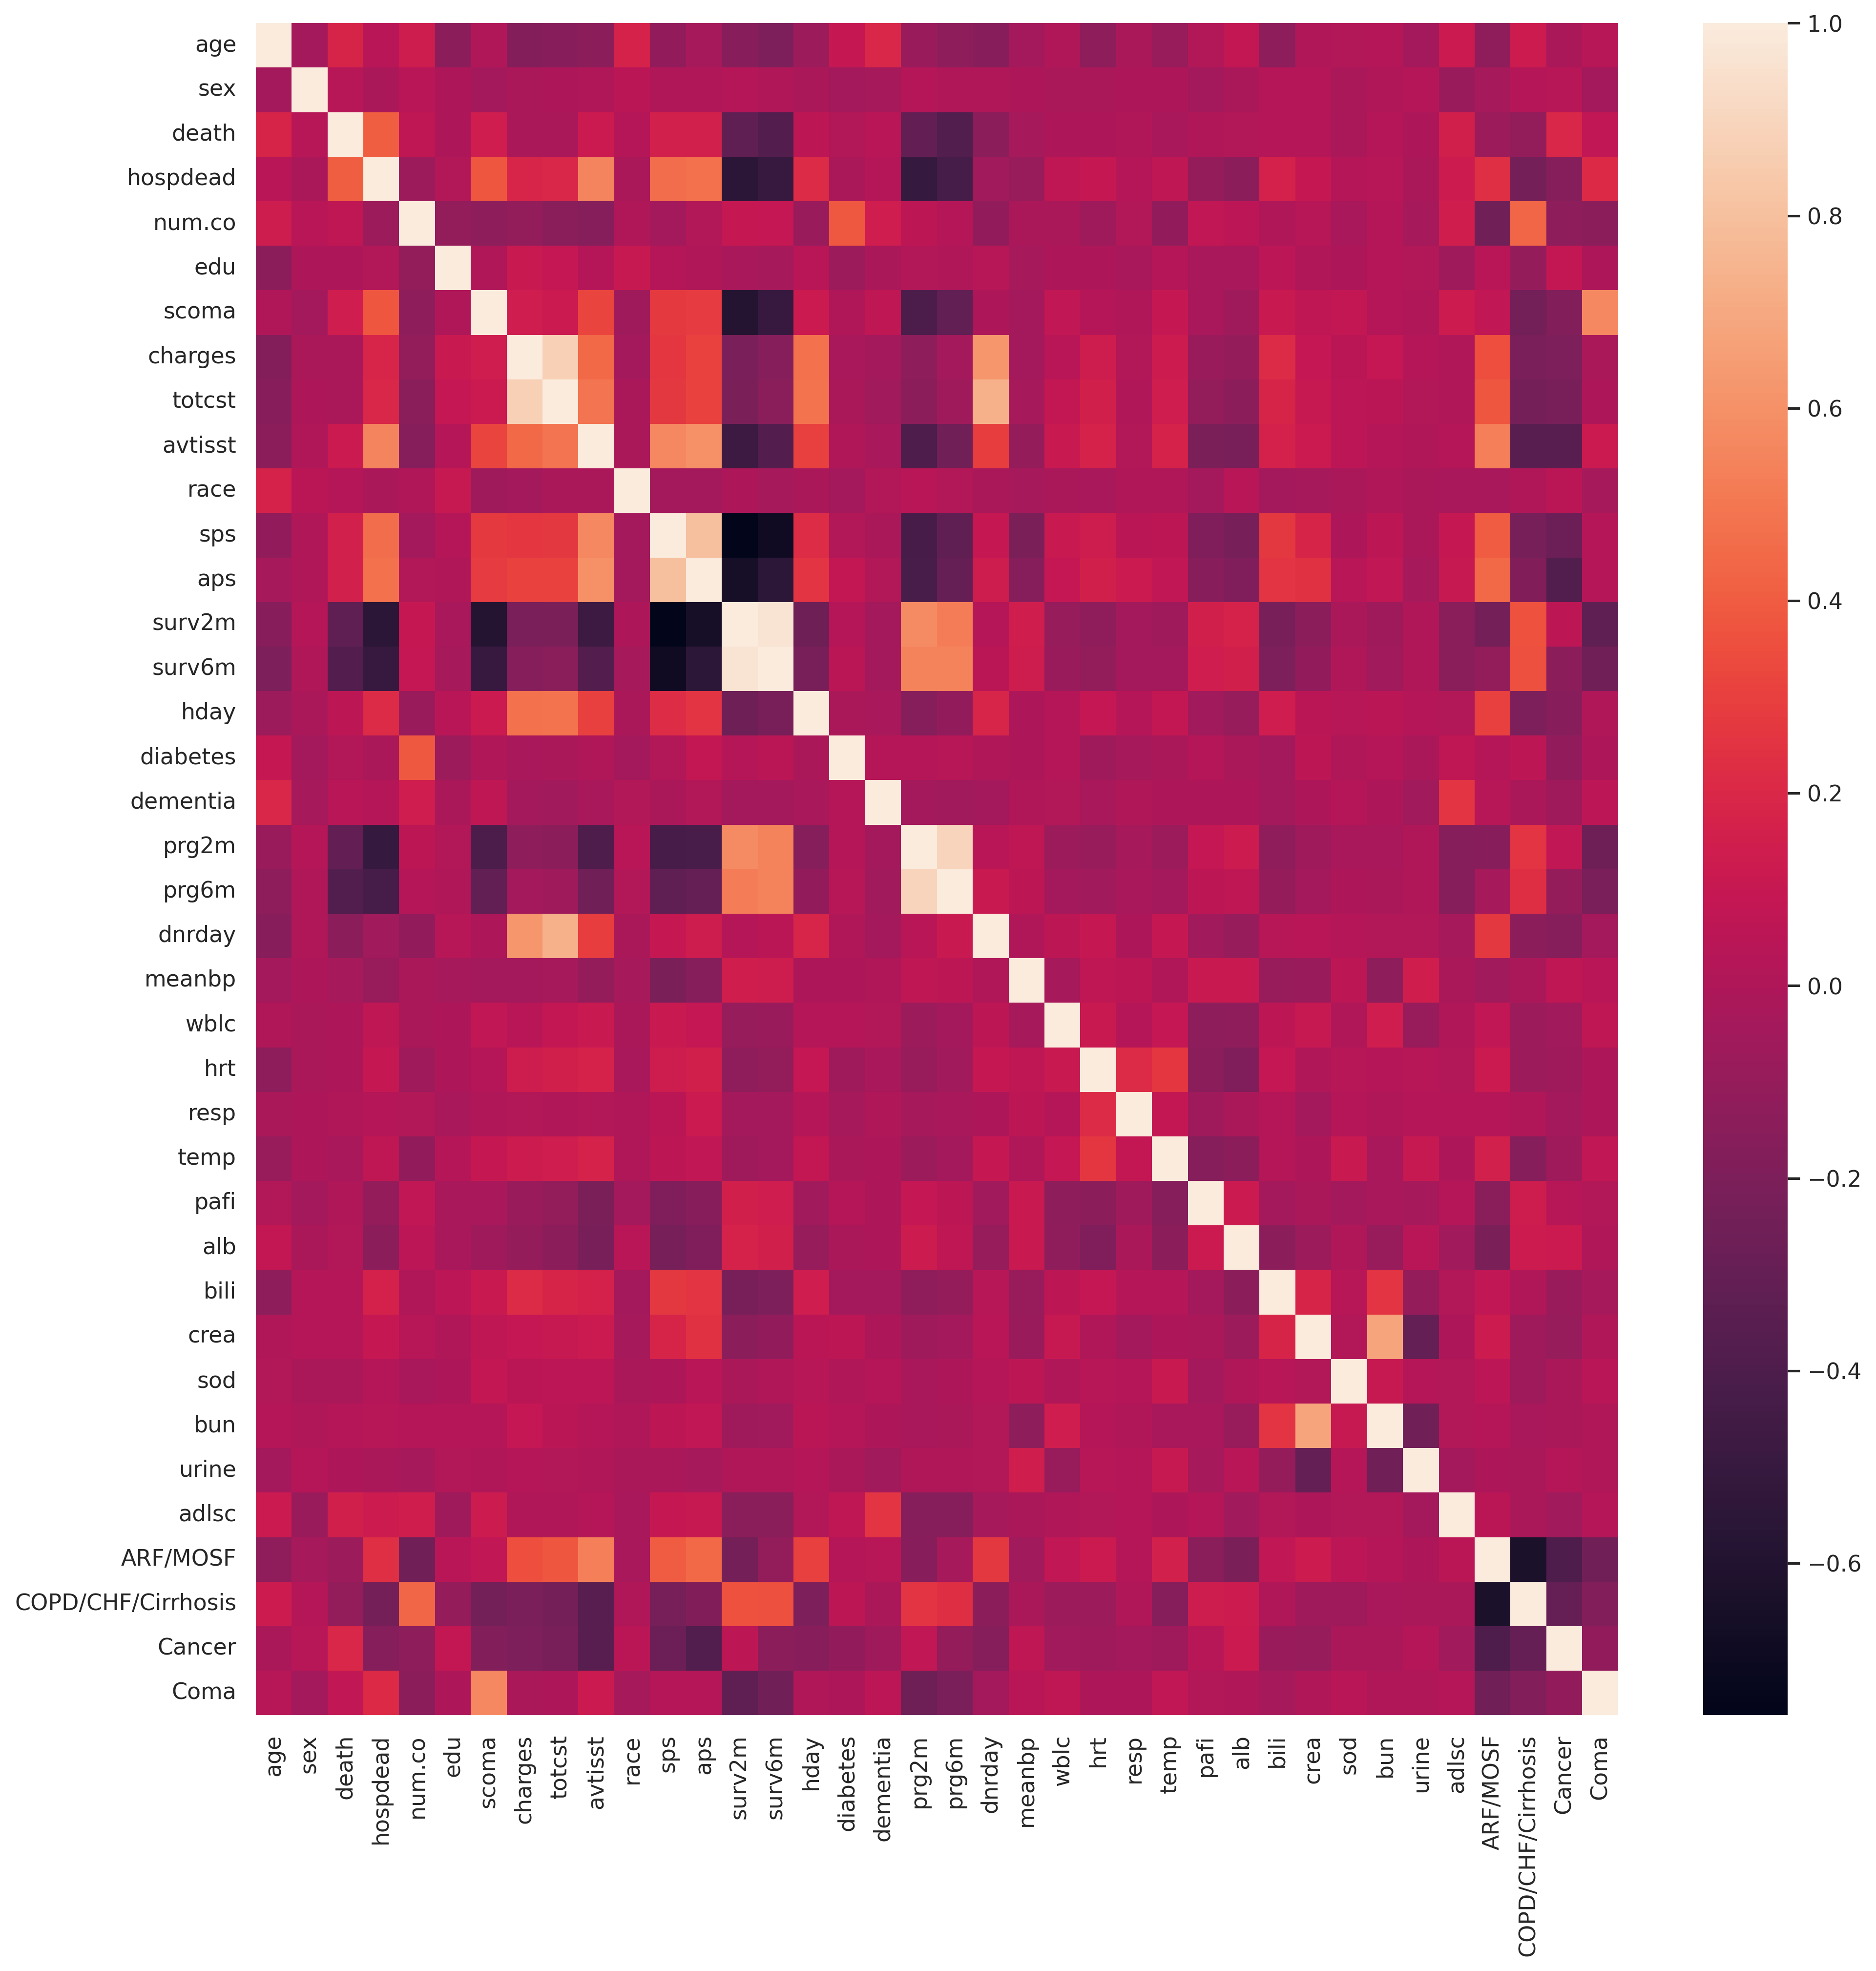

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (15, 15), dpi=300)
sns.heatmap(X.corr(numeric_only = True));